In [19]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [20]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    finalNumber1: int
    number3: int
    operation2: str
    number4: int
    finalNumber2: int
    
def adder(state: AgentState) -> AgentState:
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def adder2(state: AgentState) -> AgentState:
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtractor2(state: AgentState) -> AgentState:
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def describe_next_node_1(state: AgentState) -> str:
    if state["operation1"] == "+":
        return "additional_operation"
    elif state["operation1"] == "-":
        return "subtraction_operation"
    
def describe_next_node_2(state: AgentState) -> str:
    if state["operation2"] == "+":
        return "additional_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [21]:
graph = StateGraph(AgentState)

# Add nodes
graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("adder2", adder2)
graph.add_node("subtractor2", subtractor2)
graph.add_node("route1", lambda state:state)
graph.add_node("route2", lambda state:state)

# Define edges
graph.add_edge(START, "route1")
graph.add_conditional_edges(
    "route1",
    describe_next_node_1,
    {
        "additional_operation": "adder",
        "subtraction_operation": "subtractor"
    }
)

# Coonect first layer operations to second router
graph.add_edge("adder", "route2")
graph.add_edge("subtractor", "route2")

graph.add_conditional_edges(
    "route2",
    describe_next_node_2,
    {
        "additional_operation2": "adder2",
        "subtraction_operation2": "subtractor2"
    }
)

graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)
app = graph.compile()

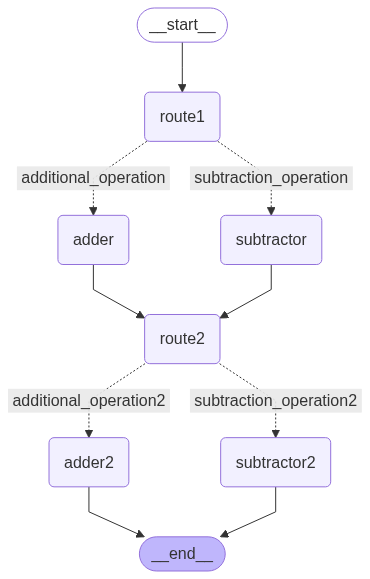

In [22]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png( max_retries=5, retry_delay=2.0)))

In [23]:
initial_state = AgentState(number1 = 10, operation1="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber1= 0, finalNumber2 = 0)

print(app.invoke(initial_state))

{'number1': 10, 'operation1': '-', 'number2': 5, 'finalNumber1': 15, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber2': 0}
